In [2]:
import pandas as pd
import numpy as np

In [ ]:
#skipfooter 밑에 4줄은 생략함.
kto_201901 = pd.read_excel('./files3/kto_201901.xlsx',header=1,usecols='A:G',skipfooter=4)
kto_201901

### 1. 컬럼명을 조회하시오.


In [ ]:
kto_201901.columns

### 2. 기초 통계량, 최대, 최소, 표준편차 4분위수를 확인하시오.

In [ ]:
kto_201901.describe()

### 3. 관광, 상용, 공용, 유학/연수는 중 한개라도 0 인것을 확인하시오.

In [ ]:
# print(kto_201901[kto_201901['관광']==0])
# print(kto_201901[kto_201901['상용']==0])
# print(kto_201901[kto_201901['공용']==0])
# print(kto_201901[kto_201901['유학/연수']==0])
kto_201901[kto_201901[["관광","상용","공용","유학/연수"]]==0].count()

### 4. 기준년월 컬럼에 파일명에 201901로 넣으시오.

In [ ]:
kto_201901['기준년월']=2019.01
kto_201901

### 5. 국적 종류를 확인하시오.

In [ ]:
# 뒷글자가 '주' 인것을 출력
kto_201901_5 = kto_201901[kto_201901.국적.str.endswith('주')]
kto_201901_5



### 6. 대륙에 해당하는 '아시아주', '미주', '구주', '대양주', '아프리카주', '기타대륙', '교포소계'를 제거하시오.

In [ ]:
kto_201901_6=kto_201901.drop([0,26,32,56,60,63,65])
kto_201901_6

In [ ]:
kto_201901_6 = kto_201901['국적'].isin([ '아시아주', '미주', '구주', '대양주', '아프리카주', '기타대륙', '교포소계'])
kto_201901_6_1 = kto_201901[~kto_201901_6]
kto_201901_6_1

### 7. 6번에 의해 인덱스가 순차적인지 않으니 새로운 인덱스로 초기화하시오.

In [ ]:
kto_201901_7=kto_201901_6.reset_index()
kto_201901_7=kto_201901_7.drop('index',axis=1)
kto_201901_7

#### 8. "대륙" 컬럼을 만드시오. 전체 60개 입니다. 순차적으로 ['아시아']*25 + ['아메리카']*5 + ['유럽']*23 + ['오세아니아']*3 + ['아프리카']*2 + ['기타대륙'] + ['교포'] 순으로 등록하시오.

In [ ]:
kto_201901_8=kto_201901_7
kto_201901_8['대륙']=['아시아']*25 + ['아메리카']*5 + ['유럽']*23 + ['오세아니아']*3 + ['아프리카']*2 + ['기타대륙'] + ['교포']
kto_201901_8

### 9. 국적별 "관광객비율(%)" 컬럼을 추가하시오.

In [ ]:
kto_201901_9=kto_201901
kto_201901_9['관광객 비율(%)']=kto_201901['관광']/kto_201901['계']
kto_201901_9

### 10. 9번의 결과에 따라 관광객비율(%) 컬럼으로 내림차순 정렬하시오.

In [ ]:
kto_201901_10=kto_201901_9
kto_201901_10.sort_values('관광객 비율(%)', ascending=False)

### 11. 전체 관광객에 대한 대륙별 관광객비율(%) 평균을 구하시오.

In [ ]:
kto_201901_11=kto_201901_5
total=kto_201901_11['관광'].sum()
print(total)
kto_201901_11['대륙별 관광객비율(%)']=kto_201901_11['관광']/total
kto_201901_11


### 12. 전체외국인중에서 관광에 해당하는 인원의 국적별 비율을 구해서 "전체비율(%)" 컬럼에 추가하시오. 전체 관광객이 884293이고 일본의 관광객은 198805이면 22.5%입니다.

In [ ]:
kto_201901_12=kto_201901
kto_201901_12['전체비율(%)']=kto_201901_12['관광']/kto_201901_6_1['관광'].sum()
kto_201901_12


### 13. 12번 항목을 전체비율(%) 컬럼 기준으로 내림차순 정렬하시오. 
- 모든 항목의 소수점은 1자리에서 반올림합니다.

In [ ]:
kto_201901_12.sort_values('전체비율(%)', ascending=False).round(2)

####################################### 

In [22]:
def create_kto_data(yy, mm):
    #1. 불러올 Excel 파일 경로를 지정해주기
    file_path = './files3/kto_{}{}.xlsx'.format(yy, mm)  
    
    # 2. Excel 파일 불러오기 
    df = pd.read_excel(file_path, header=1, skipfooter=4, usecols='A:G')
    
    # 3. "기준년월" 컬럼 추가하기 
    df['기준년월'] = '{}-{}'.format(yy, mm) 
    
    # 4. "국적" 컬럼에서 대륙 제거하고 국가만 남기기 
    ignore_list = ['아시아주', '미주', '구주', '대양주', '아프리카주', '기타대륙', '교포소계']    # 제거할 대륙명 선정하기 
    condition = (df['국적'].isin(ignore_list) == False)    # 대륙 미포함 조건 
    df_country = df[condition].reset_index(drop=True) 
    
    # 5. "대륙" 컬럼 추가하기 
    continents = ['아시아']*25 + ['아메리카']*5 + ['유럽']*23 + ['대양주']*3 + ['아프리카']*2 + ['기타대륙'] + ['교포']    # 대륙 컬럼 생성을 위한 목록 만들어 놓기 
    df_country['대륙'] = continents   
                       
    # 6. 국가별 "관광객비율(%)" 컬럼 추가하기 
    df_country['관광객비율(%)'] = round(df_country.관광 / df_country.계 * 100, 1) 
                       
    # 7. "전체비율(%)" 컬럼 추가하기 
    tourist_sum = sum(df_country['관광'])
    df_country['전체비율(%)'] = round(df_country['관광'] / tourist_sum * 100, 1)
    
    # 8. 결과 출력하기 
    return(df_country)


In [23]:
# 여러개 csv 파일 저장
df = pd.DataFrame()
for yy in range(2010, 2020):
    if (yy == 2019):
        for mm in range(1,9):
            temp = create_kto_data(str(yy), str(mm).zfill(2))
            df = df.append(temp, ignore_index=True)
    else:
        for mm in range(1, 13):
            temp = create_kto_data(str(yy), str(mm).zfill(2))
            df = df.append(temp, ignore_index=True)  

df   


,국적,관광,상용,공용,유학/연수,기타,계,기준년월,대륙,관광객비율(%),전체비율(%)
0,일본,202825,1750,89,549,3971,209184,2010-01,아시아,97.0,50.6
1,대만,35788,41,17,37,516,36399,2010-01,아시아,98.3,8.9
2,홍콩,13874,55,0,21,595,14545,2010-01,아시아,95.4,3.5
3,마카오,554,0,0,0,0,554,2010-01,아시아,100.0,0.1
4,태국,13374,39,13,53,4335,17814,2010-01,아시아,75.1,3.3
...,...,...,...,...,...,...,...,...,...,...,...
6955,대양주 기타,519,1,6,9,74,609,2019-08,대양주,85.2,0.0
6956,남아프리카공화국,634,6,1,11,1235,1887,2019-08,아프리카,33.6,0.1
6957,아프리카 기타,2081,593,165,841,1184,4864,2019-08,아프리카,42.8,0.2
6958,국적미상,36,1,0,8,12,57,2019-08,기타대륙,63.2,0.0


In [24]:
# 전체 결과를 파일로 저장
df.to_excel('./files3/kto_total1.xlsx', index = False)

In [38]:
# 파일 읽기---------------------------------------------------
import pandas as pd 
df = pd.read_excel('./files3/kto_total1.xlsx')
df.head()


,국적,관광,상용,공용,유학/연수,기타,계,기준년월,대륙,관광객비율(%),전체비율(%)
0,일본,202825,1750,89,549,3971,209184,2010-01,아시아,97.0,50.6
1,대만,35788,41,17,37,516,36399,2010-01,아시아,98.3,8.9
2,홍콩,13874,55,0,21,595,14545,2010-01,아시아,95.4,3.5
3,마카오,554,0,0,0,0,554,2010-01,아시아,100.0,0.1
4,태국,13374,39,13,53,4335,17814,2010-01,아시아,75.1,3.3


In [39]:
# 국적이 중국인것만 필터--------------------------------------
condition = (df['국적'] == '중국')
df_filter = df[condition]


In [40]:
# 폰트 설정 --------------------------------------------------
from matplotlib import font_manager, rc  #추가함
import platform
import matplotlib
plt.rcParams["figure.figsize"]=(12,5)
matplotlib.rcParams['axes.unicode_minus']=False

print(platform.system())
if platform.system() == 'Windows':   #윈도우의 경우
    font_path = "c:/Windows/Fonts/malgun.ttf"
    font_name = font_manager.FontProperties(fname=font_path).get_name()
    rc('font', family=font_name)
elif platform.system() == "Darwin":   #Mac 의 경우
    font_path = "/Users/$USER/Library/Fonts/AppleGothic.ttf"
elif platform.system() == "Linux":  # linux인 경우
    font_path ="/usr/share/fonts/truetype/nanum/NanumGothic.ttf"
    font_name = font_manager.FontProperties(fname=font_path).get_name()
    rc('font', family=font_name)
    print(font_name)

Linux
NanumGothic


In [41]:
# 그래프로 출력하기--------------------------------------------
import matplotlib.pyplot as plt
plt.figure(figsize = (24, 10))

<Figure size 1728x720 with 0 Axes>

<Figure size 1728x720 with 0 Axes>

([<matplotlib.axis.XTick at 0x7fe5bfc54a10>,
 <a list of 10 Text xticklabel objects>)

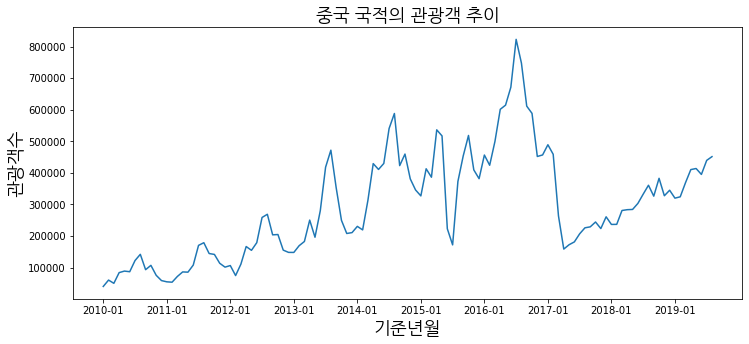

In [42]:
## 그래프 내용 설정 
import matplotlib.pyplot as plt
import matplotlib.font_manager as fm
plt.plot(df_filter['기준년월'], df_filter['관광'])

path = '/usr/share/fonts/truetype/nanum/NanumGothic.ttf'
fontprop=fm.FontProperties(fname=path, size=18)
## 그래프 타이틀, X축, Y축 이름 달기 
plt.title('중국 국적의 관광객 추이', fontproperties=fontprop)
plt.xlabel('기준년월', fontproperties=fontprop)
plt.ylabel('관광객수', fontproperties=fontprop)
plt.xticks(['2010-01', '2011-01', '2012-01', '2013-01', '2014-01', '2015-01', '2016-01', '2017-01', '2018-01', '2019-01'])

###############################

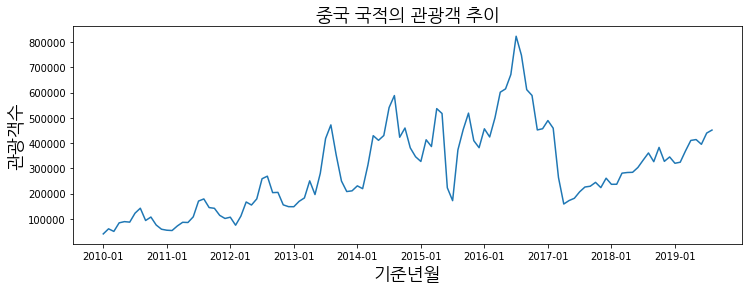

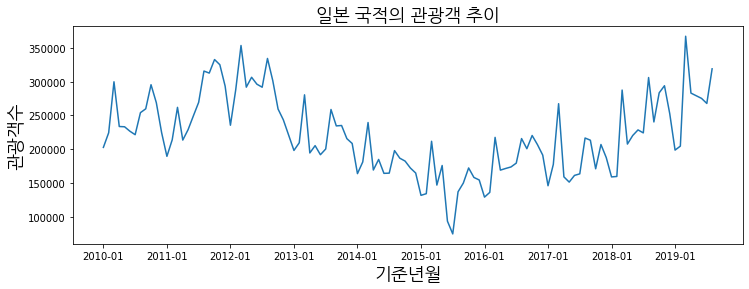

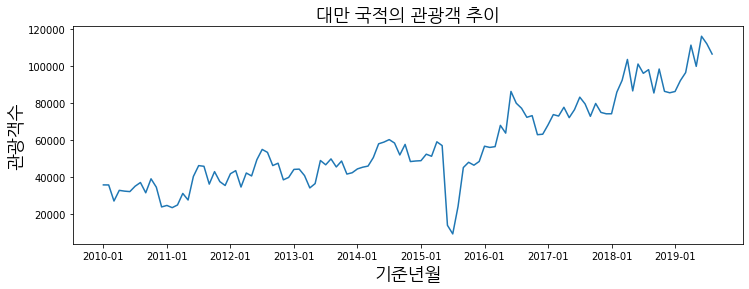

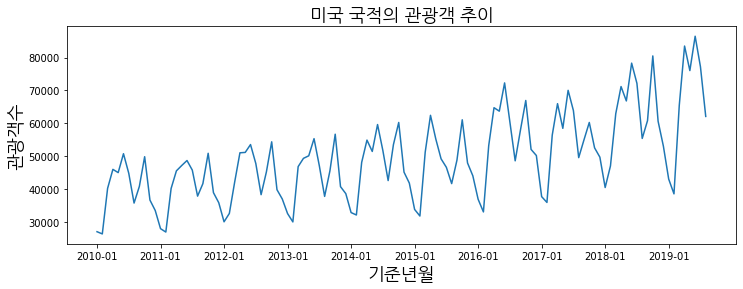

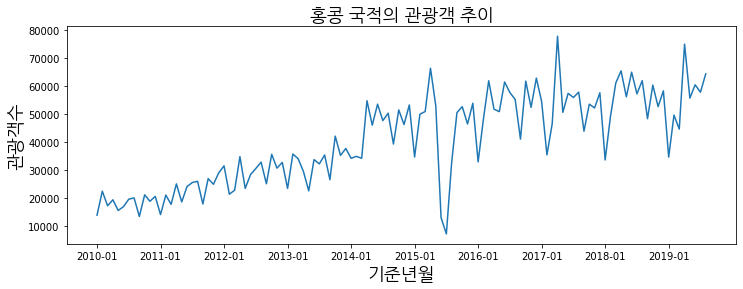

In [43]:
cntry_list = ['중국', '일본', '대만', '미국', '홍콩']

for cntry in cntry_list: 
    # 국적 관광객만 추출하기 
    condition = (df['국적'] == cntry)
    df_filter = df[condition]

    # 그래프 그리기 
    ## 그래프 크기 조절 
    plt.figure(figsize = (12, 4))
    
    ## 그래프 내용 설정 
    plt.plot(df_filter['기준년월'], df_filter['관광'])

    path = '/usr/share/fonts/truetype/nanum/NanumGothic.ttf'
    fontprop=fm.FontProperties(fname=path, size=18)
    ## 그래프 타이틀, X축, Y축 이름 달기 
    plt.title('{} 국적의 관광객 추이'.format(cntry), fontproperties=fontprop)
    plt.xlabel('기준년월', fontproperties=fontprop)
    plt.ylabel('관광객수', fontproperties=fontprop)
    plt.xticks(['2010-01', '2011-01', '2012-01', '2013-01', '2014-01', '2015-01', '2016-01', '2017-01', '2018-01', '2019-01'])